# 2020-10-02

Analyzing Rpb1-MS2 movies.

## Contents:
- HMM to call bursts
- Cross-correlation
- Triggered averaging on rises and falls
- Beginning of analysis of variable length lacZ constructs

## Building an HMM to call bursts in MS2 data

Nick has built a quite sophisticated HMM to analyze MS2 data. I would really like to learn how to make an HMM, so this seems like a good thing to start with. Kinda like this whole pipeline, the goal isn't to replace what's been done by the Garcia group, but to learn things for myself and (somewhat) to complement their work.

In [1]:
# Import public packages.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage as ndi 
from importlib import reload
import pickle
import czifile
%matplotlib inline

# Import my packages.
import sys
sys.path.append('/Users/michaelstadler/Bioinformatics/Projects/rpb1/bin')
import imagep as imp
reload(imp)
from imagep import viewer, save_pickle, load_pickle, box_spots, read_czi

In [4]:
eve2 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180811-rpb1-eve-em1-zsmv-03.pkl')
eve3 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180811-rpb1-eve-em2-zsmv-04-05.pkl')

# 2020-09-09: Developing ways to call bursts

I want to at least try my hand at making a simple HMM to fit the traces. Unclear how useful it would be but it's at least something to learn. Going to try to work through hmmlearn to start.

In [18]:
from hmmlearn import hmm

model = hmm.GaussianHMM(n_components=2, covariance_type="full")
model.startprob_ = np.array([0.6, 0.4])
model.transmat_ = np.array([[0.9, 0.1],
                             [0.1, 0.9]])
model.means_ = np.array([[0.2], [0.8]])
model.covars_ = np.tile([0.05], (2, 1, 1))
#model.covars_ = [[0.5], [0.5]]
X, Z = model.sample(100)

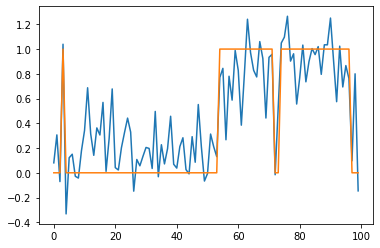

In [10]:
plt.plot(X)
plt.plot(Z)

GaussianHMM(covariance_type='full', n_components=2, n_iter=100)

In [ ]:
plt.plot(X)
plt.plot(Z2)

In [26]:
remodel.transmat_

array([[0.88725419, 0.11274581],
       [0.11357212, 0.88642788]])

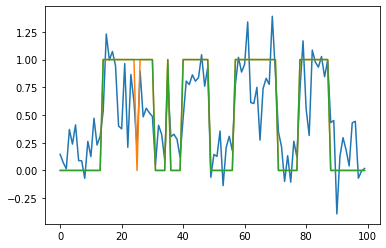

In [34]:
remodel = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
remodel.fit(X)
Z2 = remodel.predict(X)
plt.plot(X)
plt.plot(Z)
plt.plot(Z2)

In [42]:
eve3.intvol.iloc[0:30,:]

,1,2,3,4,5,6,7,8,9,10,...,85,86,87,88,89,90,91,92,93,94
0,2695.600000,1292.019355,2208.916129,2050.238710,2097.277419,1086.161290,2421.200000,2381.464516,872.045161,1384.406452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2303.283871,1383.522581,2619.754839,2143.212903,2259.606452,1097.174194,2264.658065,2777.909677,850.374194,1305.025806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2631.090323,1184.664516,2346.529032,2875.735484,1868.819355,1415.167742,2499.374194,2885.283871,NaN,1107.503226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2103.870968,1499.548387,1793.548387,2674.077419,2160.761290,1769.225806,1838.329032,2856.819355,983.832258,1165.477419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2042.000000,1765.722581,1845.303226,2737.309677,1823.296774,1792.670968,1784.116129,2386.387097,1217.406452,1107.890323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2676.509677,1578.341935,1764.316129,2598.161290,1936.025806,1771.838710,1503.290323,2455.980645,956.541935,1247.167742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2371.735484,1873.993548,2045.780645,2415.735484,1739.116129,1992.922581,1470.096774,1844.638710,939.212903,1311.954839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2324.380645,1731.800000,2264.245161,2048.767742,1513.600000,2124.961290,1411.329032,1404.767742,832.077419,1228.606452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2771.638710,1856.587097,1381.412903,1942.993548,1419.774194,1937.909677,1259.270968,1389.961290,1264.032258,1219.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2306.296774,2076.000000,2314.612903,2002.890323,983.025806,1956.225806,1301.774194,1098.683871,1174.696774,1786.722581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
def make_hmm_data(intvol, minlen):
    data = []
    lengths = []
    for col in intvol:
        if (np.count_nonzero(~np.isnan(intvol[col])) >= minlen):
            trace = intvol[col]
            trace_norm = (trace - trace.min()) / (trace.max() - trace.min())
            data = data + trace_norm.values.tolist()
            lengths.append(len(intvol[col]))
    data = np.array(data)
    data = np.expand_dims(data, axis=1)
    return data, lengths

data, lengths = make_hmm_data(eve3.intvol.iloc[0:40,:], 40)

In [98]:
data.shape

(240, 1)

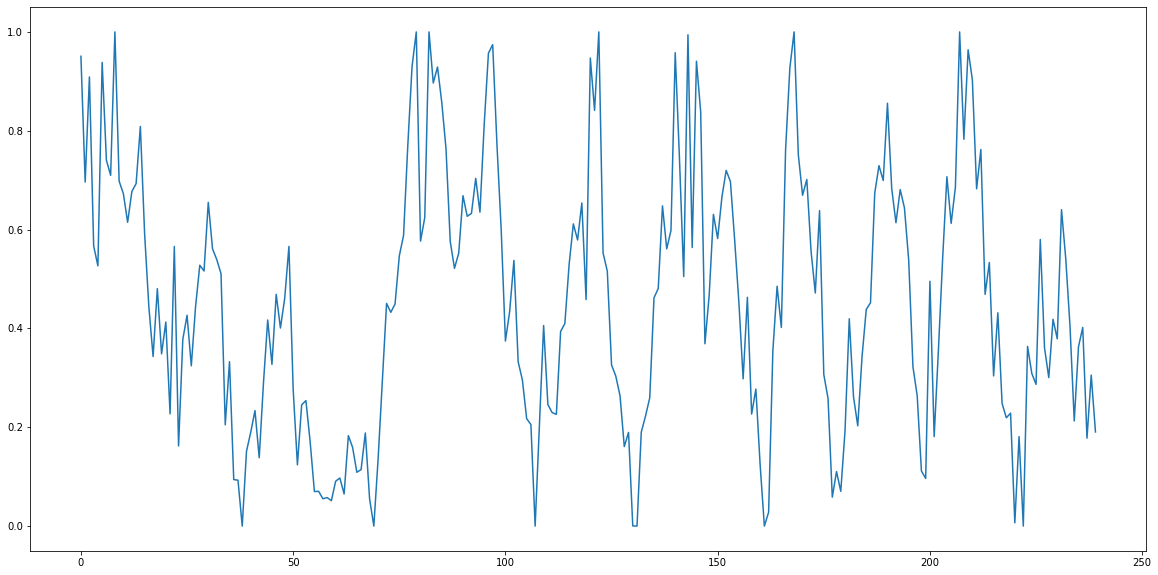

In [78]:
plt.figure(figsize=(20,10))
plt.plot(a);

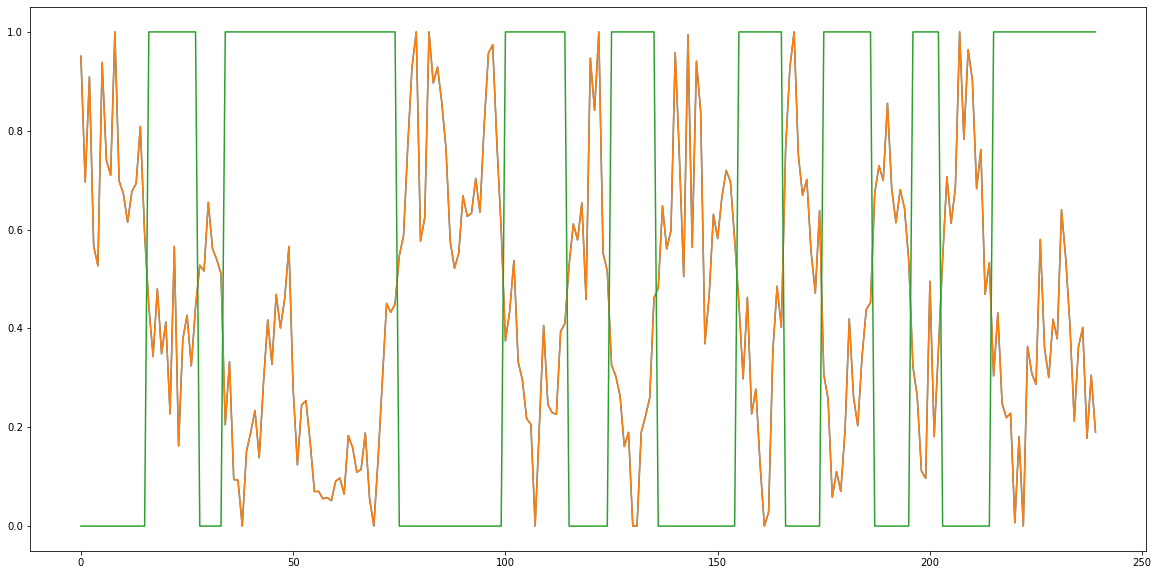

In [116]:
mod = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
mod.fit(data, lengths=np.repeat(40,3))
Z = mod.predict(data)
plt.figure(figsize=(20,10))
plt.plot(a);
plt.plot(data)
plt.plot(Z)

So after watching a ton of videos about HMMs and spending an inordinate amount of time trying to figure out what's going on...this actually works surprisingly well???? Certainly seems to be able to trivially find high regions and low regions, which is better than I expected. One thing I need for sure is the ability to account for NAs. I need to 1) trim NAs from the beginning and end of trajectories and 2) do something with internal NAs (or figure out how HMM handles them), and 3) back the HMM states out to match them to the original traces again.

In [591]:
############################################################################
def filter_df_minlen(df, minlen):
    df_f = df.copy()
    def test(x):
        if (np.count_nonzero(~np.isnan(x)) >= minlen):
            return True
        return False
    boolean = df_f.apply(test, axis=0)
    df_f = df_f.iloc[:,np.where(boolean)[0]]
    df_f.columns=np.arange(1, df_f.shape[1]+1)
    return df_f

def make_hmm_data(intvol_og):
    def trim_nan(x):
        """Trim leading and trailing NAs."""
        indexes_valid = np.where(~np.isnan(x))[0]
        first_valid = indexes_valid[0]
        last_valid = indexes_valid[-1]
        x_trimmed = x.iloc[first_valid:(last_valid+1)]
        return x_trimmed, first_valid, last_valid
    
    def find_nearest_nonnan(x, idx, inc):
        """Search for the nearest valid (non-NA) entry either forward or 
        backward."""
        for i in range(1, 10):
            test_index = idx + (i * inc)
            val = x.iloc[test_index]
            if (not np.isnan(val)):
                return val
        raise Error('Could not find non-nan neighbor.')
    
    def interp_nan(x):
        """Replace internal NAs with values interpolated as the means of the 
        nearest non-NA values"""
        indexes_nan = np.where(np.isnan(x))[0]
        for i in indexes_nan:
            prev_valid = find_nearest_nonnan(x, i, -1)
            next_valid = find_nearest_nonnan(x, i, 1)
            x.iloc[i] = np.mean([prev_valid, next_valid])
        return x
    
    intvol = intvol_og.copy()
    data = []
    lengths = []
    trimlocs = []
    for col in intvol:        
        trace = intvol[col]
        trace, first_valid, last_valid = trim_nan(trace)
        trace = interp_nan(trace)
        trace_norm = (trace - trace.min()) / (trace.max() - trace.min())
        data = data + trace_norm.values.tolist()
        lengths.append(len(trace_norm))
        trimlocs.append((col, first_valid, last_valid))
    data = np.array(data)
    data = np.expand_dims(data, axis=1)
    return data, lengths, trimlocs

def hmm_fit_run(data, lengths, n_components=2, n_iter=100):
    #means_prior = np.expand_dims(np.array([-200, 200]), axis=1)
    mod = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=n_iter)
    mod.fit(data, lengths=lengths)
    #mod.means_priors = [-200, 200]
    Z = mod.predict(data)
    # Set higher-mean state to be state 1, lower to state 0.
    if (np.mean(data[Z == 0]) > np.mean(data[Z == 1])):
        Z2 = Z.copy()
        Z2[Z == 0] = 1
        Z2[Z == 1] = 0
        Z = Z2
        
    return mod, Z

def parse_states(intvol, Z, lengths, trimlocs):
    """Take HMM inferred states, create a state df and list of transitions ()"""
    states = np.full(intvol.shape, np.nan)
    loc = 0
    state_starts = []
    state_ends = []
    # For each trajectory.
    for i in range(0, len(lengths)):
        length = lengths[i]
        id_, start, end = trimlocs[i]
        Z_sub = Z[loc:(loc + length)]
        states[start:(end+1), (id_-1)] = Z_sub
        loc = loc + length
    
    states_df = pd.DataFrame(states, columns=np.arange(1, states.shape[1] + 1))
    
    # Find starts and stops.
    for i in range(1, states_df.shape[1] + 1):
        diffs = states_df[i].diff()
        state_starts_loc = np.where(diffs == 1)[0]
        state_ends_loc = np.where(diffs == -1)[0]
        for n in state_starts_loc:
            state_starts.append((i, n))
        for m in state_ends_loc:
            state_ends.append((i, m))
        
    return pd.DataFrame(states, columns=np.arange(1, states.shape[1] + 1)), state_starts, state_ends   
#?hmm.GaussianHMM

This is pretty interesting. Seems to work respectably well...not sure what there is to add to the model. Seems like a plausible way to demarcate higher areas. One thing I do wonder is about using some kind of derivative...

In [1]:
eve_mvs = [
    '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180811-rpb1-eve-em1-zsmv-03.pkl',
    '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180811-rpb1-eve-em1-zsmv-06.pkl',
    '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180811-rpb1-eve-em2-zsmv-04-05.pkl',
    '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180915-rpb1-eve-em4-zsmv-01-02.pkl',
    '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180915-rpb1-eve-em4-zsmv-04-06.pkl',
    '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180915-rpb1-eve-em4-zsmv-07.pkl',
    '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180915-rpb1-eve-em5-zsmv-02-03.pkl',
    '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180915-rpb1-eve-em5-zsmv-05-04.pkl',
    '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20180915-rpb1-eve-em6-zsmv-02.pkl'  
]

In [2]:
# Combine all traces.
def combine_intvols(mvs):
    def concat_dfs(a, b):
        def pad_df(small, big):
            pad = np.empty((len(big) - len(small), small.shape[1]))
            pad[:] = np.nan
            padded = np.concatenate([pad, small], axis=0)
            return padded
    
        if (len(a) < len(b)):
            a = pad_df(a, b)
        elif (len(b) < len(a)):
            b = pad_df(b, a)
    
        return np.concatenate([a,b], axis=1)
    
    mv = load_pickle(mvs[0])
    intvol = np.array(mv.intvol.copy())
    prot = np.array(mv.prot.copy())
    
    del mv
    for file in mvs[1:]:
        mv = load_pickle(file)
        intvol = concat_dfs(intvol, mv.intvol)
        prot = concat_dfs(prot, mv.prot)
        del mv

    return pd.DataFrame(intvol), pd.DataFrame(prot)

intvol, prot = combine_intvols(eve_mvs)

NameError: name 'load_pickle' is not defined

In [603]:
intvol_f = filter_df_minlen(intvol, 25)
prot_f = filter_df_minlen(prot, 25)
data, lengths, trimlocs = make_hmm_data(intvol_f)
mod, Z = hmm_fit_run(data, lengths)
states, starts, ends = parse_states(intvol_f, Z, lengths, trimlocs)

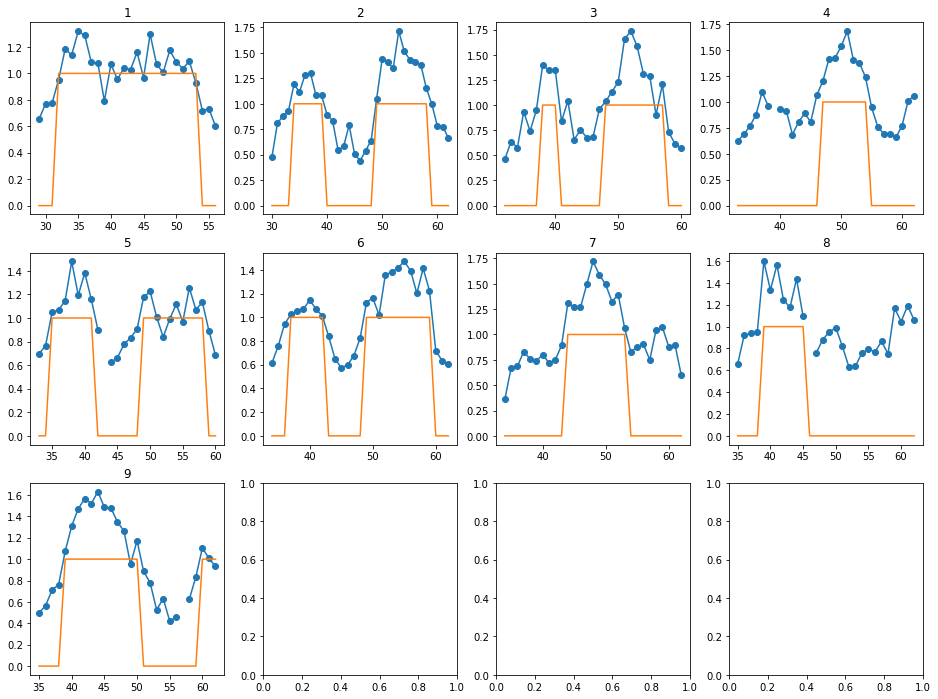

In [551]:
df = intvol_f
def test(x):
    plt.plot(df[x] / np.mean(df[x]), marker="o") # volume integration in blue.
    plt.plot(states[x])
    #plt.axvspan(20,30, color='gray', alpha=0.5)
    plt.title(x)
#imp.plot_ps(test, range(1,num_to_plot+1))
imp.plot_ps(test, range(1,10))

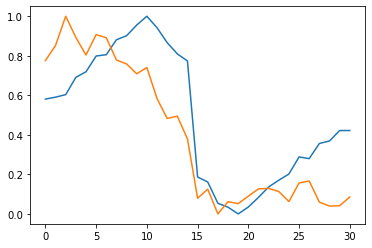

In [626]:
sig = ends
a = imp.align_traces(intvol_f, sig, 31).mean()
#plt.plot(a.mean())
b = imp.align_traces(prot_f, sig, 31).mean()
plt.plot((a - a.min()) /(a.max() - a.min()))
plt.plot((b - b.min()) /(b.max() - b.min()))

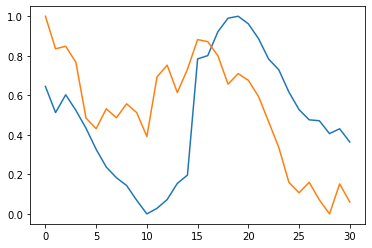

In [627]:
sig = starts
a = imp.align_traces(intvol_f, sig, 31).mean()
#plt.plot(a.mean())
b = imp.align_traces(prot_f, sig, 31).mean()
plt.plot((a - a.min()) /(a.max() - a.min()))
plt.plot((b - b.min()) /(b.max() - b.min()))

### Hmm...

So this is sort of interesting. At least it's coherent — the pol2 change leads the MS2 change at starts and stops. It's too bad that the numbers are still kinda low. We would need a LOT of data to do a lot here...then again, it's certainly possible to get lots of data. 

I wonder if triggering to the starts and ends of bursts is really the right thing. For some questions, perhaps. But maybe we just need to get more basic with the signal analysis. The question is really: "are changes in the MS2 signal related to the Rpb1 signal". I think cross-correlation seems like a strong candidate here. Specifically, I wonder about looking at the cross-correlation of the derivatives? Our expectation is that changes in one signal will be reflected by changes in the other, with some time lag, which is literally the cross-correlation. Let's dig into that.

<ipython-input-637-885277853b7e>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


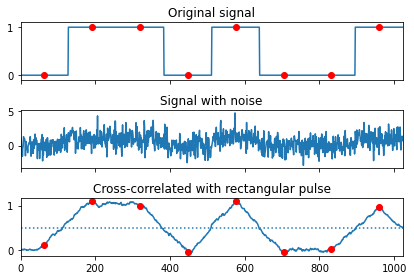

In [637]:
>>> from scipy import signal
>>> sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
>>> sig_noise = sig + np.random.randn(len(sig))
>>> corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128
>>>
>>> clock = np.arange(64, len(sig), 128)
>>> fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
>>> ax_orig.plot(sig)
>>> ax_orig.plot(clock, sig[clock], 'ro')
>>> ax_orig.set_title('Original signal')
>>> ax_noise.plot(sig_noise)
>>> ax_noise.set_title('Signal with noise')
>>> ax_corr.plot(corr)
>>> ax_corr.plot(clock, corr[clock], 'ro')
>>> ax_corr.axhline(0.5, ls=':')
>>> ax_corr.set_title('Cross-correlated with rectangular pulse')
>>> ax_orig.margins(0, 0.1)
>>> fig.tight_layout()
>>> fig.show()

In [693]:
def cc(df1, df2, size):
    def trim_nan(x):
            """Trim leading and trailing NAs."""
            indexes_valid = np.where(~np.isnan(x))[0]
            first_valid = indexes_valid[0]
            last_valid = indexes_valid[-1]
            x_trimmed = x.iloc[first_valid:(last_valid+1)]
            return x_trimmed
        
    corr = np.zeros((2*size) - 1) 
    for n in range(0, df1.shape[1]):
        x1 = trim_nan(df1.iloc[:,n])
        x2 = trim_nan(df1.iloc[:,n])
        if (np.count_nonzero(np.isnan(x1)) == 0):
            corr_l = signal.correlate(x1.iloc[0:size], x2.iloc[0:size])
            corr = corr + corr_l

        #print(len(x1.iloc[0:size]))
        #print(len(signal.correlate(x1.iloc[0:size], x2.iloc[0:size])))
        #print()
    return corr

corr = cc(intvol_f, prot_f, 25)

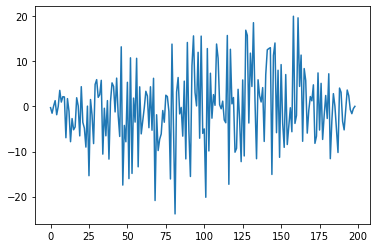

In [757]:
plt.plot(signal.correlate(np.random.randn(100), np.random.randn(100)))

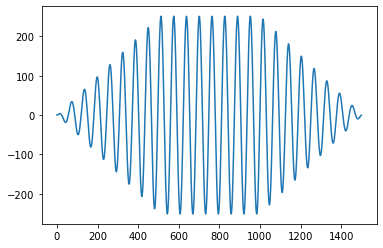

In [758]:
np.sin(np.arange(0,100))
plt.plot(signal.correlate(np.sin(np.arange(0,50, 0.1)), np.cos(np.arange(0,100,0.1))))

In [732]:
pdata, lengths, trimlocs = make_hmm_data(prot_f)

array([1, 4, 9])

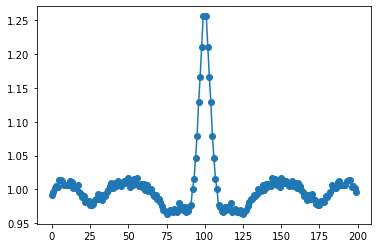

In [753]:
s = signal.correlate(data,data)
rdata = data.copy()
np.random.shuffle(rdata)
r = signal.correlate(rdata, rdata)
#plt.plot(np.multiply(s, norm));
midp = int(len(s) / 2)
n=100
#plt.plot(s[(midp - n):(midp + n)])
#plt.plot(r[(midp - n):(midp + n)])
norm = np.divide(s, r)
norm[midp] = np.nan
plt.plot(norm[(midp - n):(midp + n)], marker="o")

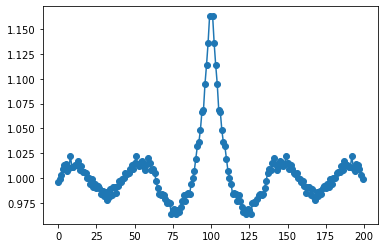

In [754]:
s = signal.correlate(pdata,pdata)
rdata = pdata.copy()
np.random.shuffle(rdata)
r = signal.correlate(rdata, rdata)
norm = signal.correlate(np.ones(len(data)), np.ones(len(data)))
#plt.plot(np.multiply(s, norm));
midp = int(len(s) / 2)
n=100
norm = np.divide(s, r)
norm[midp] = np.nan
plt.plot(norm[(midp - n):(midp + n)], marker="o")

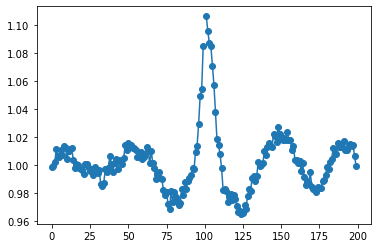

In [755]:
s = signal.correlate(data,pdata)
rdata = data.copy()
rpdata = pdata.copy()
np.random.shuffle(rdata)
np.random.shuffle(rpdata)
r = signal.correlate(rdata, rpdata)
norm = signal.correlate(np.ones(len(data)), np.ones(len(data)))
#plt.plot(np.multiply(s, norm));
midp = int(len(s) / 2)
n=100
norm = np.divide(s, r)
norm[midp] = np.nan
plt.plot(norm[(midp - n):(midp + n)], marker="o")

This is sorta interesting. It's possible that there's something in the MS2-protein signal. The fact that it's not symmetrical I suppose suggests that there's some bias in the signal? Certainly consistent with expectation.

What about using the derivative?

[-1.55804745 -0.99978566  0.01556165  0.84314824  1.52973102  1.65613743
  1.61710511  1.2580148   0.9205543   0.249129  ]


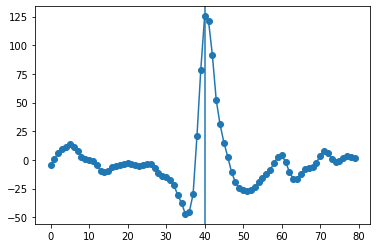

In [802]:
def plot_cc(indata1, indata2, window, lag):
    data1 = pd.Series(indata1[:,0])
    data2 = pd.Series(indata2[:,0])
    
    data1 = data1.rolling(window, center=True).mean().diff(lag)
    data2 = data2.rolling(window, center=True).mean().diff(lag)
    
    data1 = data1.to_numpy()
    data2 = data2.to_numpy()
    data1[np.isnan(data1)] = 0
    data2[np.isnan(data2)] = 0
    
    s = signal.correlate(data1, data2)
    print(s[200:210])
    rdata1 = data1.copy()
    rdata2 = data2.copy()
    np.random.shuffle(rdata1)
    np.random.shuffle(rdata2)
    r = signal.correlate(rdata1, rdata2)
    norm = signal.correlate(np.ones(len(data1)), np.ones(len(data1)))
    #plt.plot(np.multiply(s, norm));
    midp = int(len(s) / 2)
    n=40
    norm = np.divide(s, r)
    norm[midp] = np.nan
    #plt.plot(norm[(midp - n):(midp + n)], marker="o")
    plt.plot(s[(midp - n):(midp + n)], marker="o")
    plt.axvline(x=n)
plot_cc(data, pdata, 3, 3)

Hmm, a little hard to interpret, but definitely an asymmetry. Not entirely sure how to interpret the directionality. Don't now which one we are sliding against the other. How about an alternative: just plot the pol2 signal around instantaneous rises of various magnitudes. First, Kind of curious how the derivatives look with different parameters.



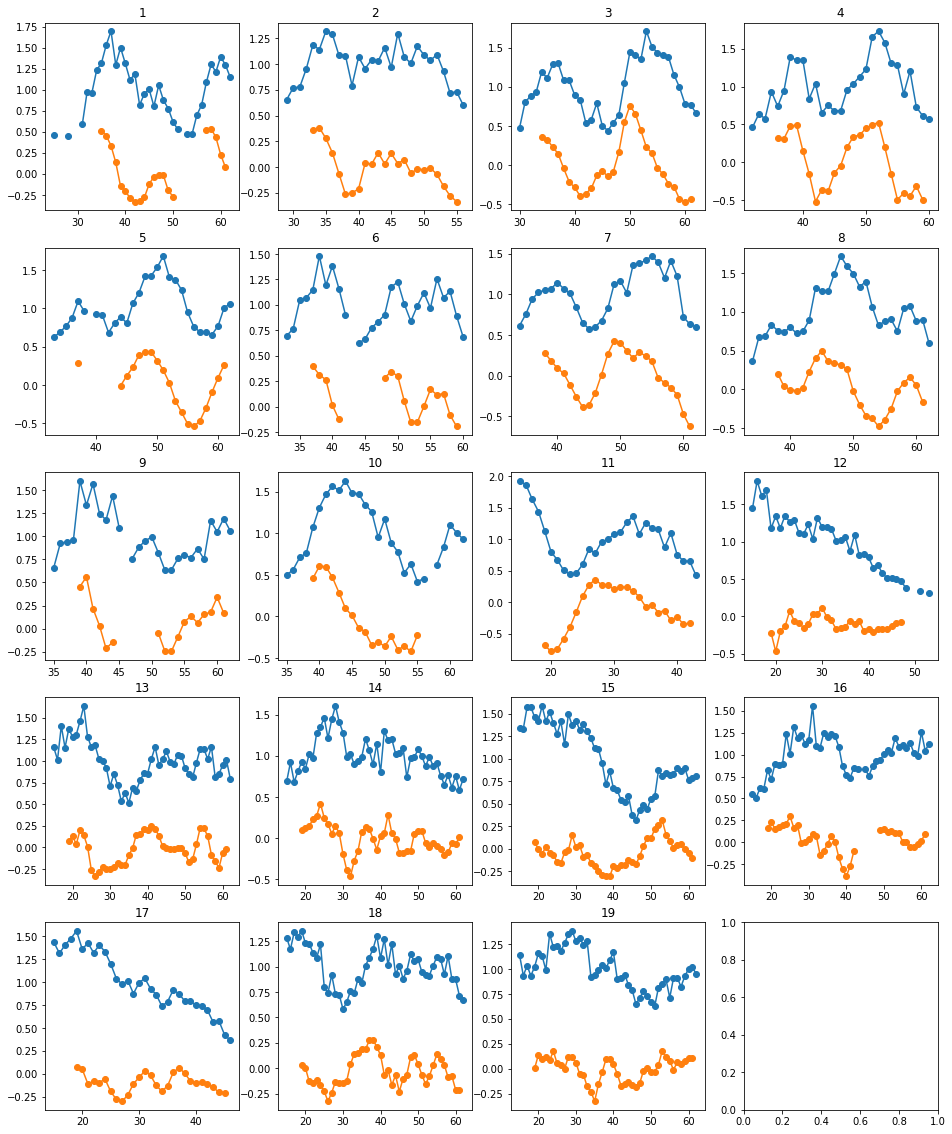

In [814]:
df = intvol_f
window=3
lag=3

def test(x):
    x1 = df[x].copy()
    x1 = x1 / np.mean(x1)
    plt.plot(x1 , marker="o") # original in blue.
    x1 = x1.rolling(window, center=True).mean().diff(lag)
    plt.plot(x1, marker="o") # derivative in orange.

    #plt.axvspan(20,30, color='gray', alpha=0.5)
    plt.title(x)
#imp.plot_ps(test, range(1,num_to_plot+1))
imp.plot_ps(test, range(1,20))

In [912]:
 def interp_nan(x):
        """Replace internal NAs with values interpolated as the means of the 
        nearest non-NA values"""
        indexes_nan = np.where(np.isnan(x))[0]
        for i in indexes_nan:
            prev_valid = find_nearest_nonnan(x, i, -1)
            next_valid = find_nearest_nonnan(x, i, 1)
            x.iloc[i] = np.mean([prev_valid, next_valid])
        return x
    
def findrises(df, windowsize, lag, min_, max_, rise=True, norm=True, display=False):
    events = []
    for spot in df:
        data = df[spot].copy()
        if (norm):
            data_norm = (data - data.min()) / (data.max() - data.min())
        else:
            data_norm = data
        rolling_avg = data_norm.rolling(windowsize, center=True).mean()
        diff = rolling_avg.diff(lag)
        
        if rise:
            indices = np.where((diff > min_) & (diff < max_))
        else:
            indices = np.where((diff < (-1 * min_)) & (diff > (-1 * max_)))
        
        """
        last_index = [0,0]
        for i in indices[0]:
            # In a run of consecutive indexes.
            if (last_index == [spot, i-1]):
                last_index = [spot, i]
            else:
                events.append([spot, i])
                last_index = [spot, i]
        """
        for i in indices[0]:
            events.append([spot, i])
            
    if display:
        nframes = len(df)
        ax = imp.qax(nframes+1)

        for n in range(1, nframes-1):
            ax[n].plot(df[n])
            for event in events:
                if (event[0] == n):
                    pass
                    ax[n].axvline([event[1]], color="black", linestyle="--")
    print(len(events))
    return events

def plot_triggered(df1, df2, locs, norm=True):
    def norm_(x):
        return (x - x.min()) / (x.max() - x.min())
    
    df1_means = imp.align_traces(df1, locs, 25).mean()
    df2_means = imp.align_traces(df2, locs, 25).mean()
    if (norm):
        df1_means = norm_(df1_means);
        df2_means = norm_(df2_means);
    df1_means.plot()
    df2_means.plot()
    plt.axvline([12], color="black", linestyle="--");



2868
2078
1400
881
511
249


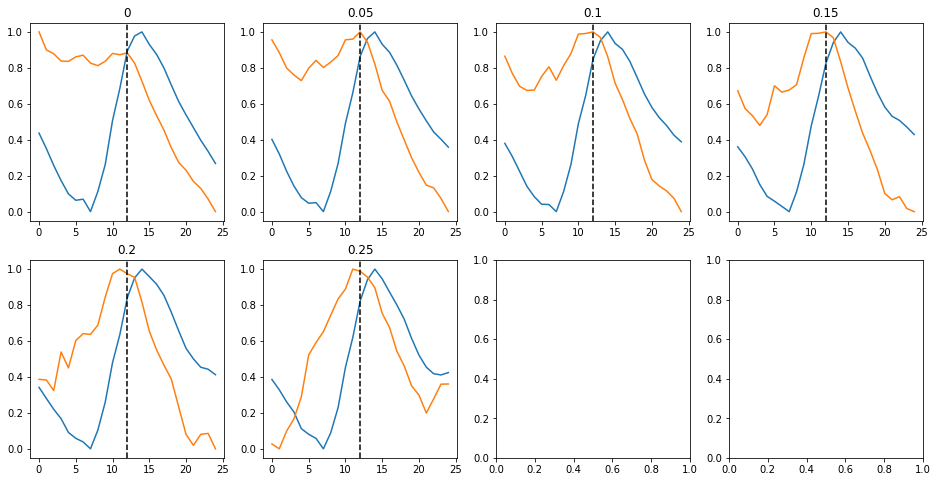

In [913]:
# From MS2 rises
def f(x):
    rises_intvol_all = findrises(intvol_f,5,3,x,100,norm=True)
    plot_triggered(intvol_f, prot_f, rises_intvol_all, norm=True)
    plt.title(x)
imp.plot_ps(f, [0,0.05,0.1,0.15,0.2,0.25])

2868
2078
1400
881
511
249


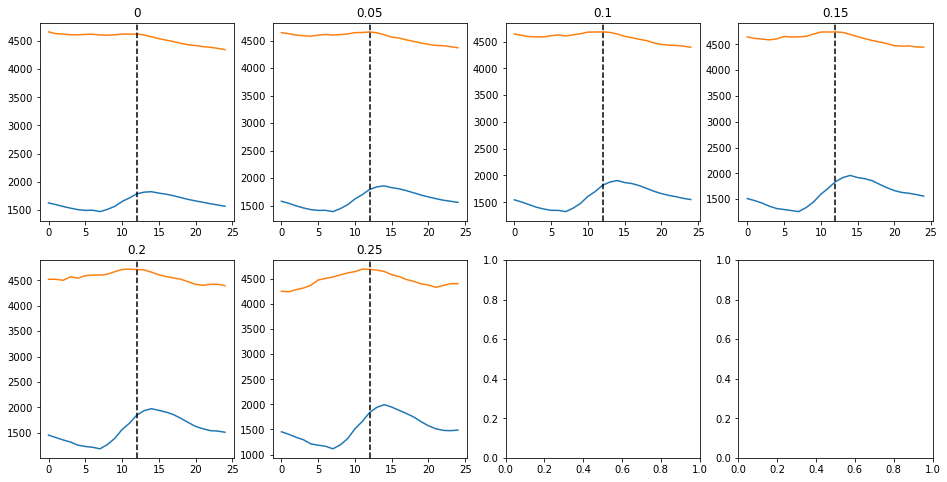

In [901]:
# From MS2 rises
def f(x):
    rises_intvol_all = findrises(intvol_f,5,3,x,100,norm=True)
    plot_triggered(intvol_f, prot_f, rises_intvol_all, norm=False)
    plt.title(x)
imp.plot_ps(f, [0,0.05,0.1,0.15,0.2,0.25])

In [910]:
np.std(prot_f.iloc[:]).mean()


582.6881220339685

2315
Norman!!!!
1340
Norman!!!!
746
Norman!!!!
378
Norman!!!!
190
Norman!!!!
89
Norman!!!!


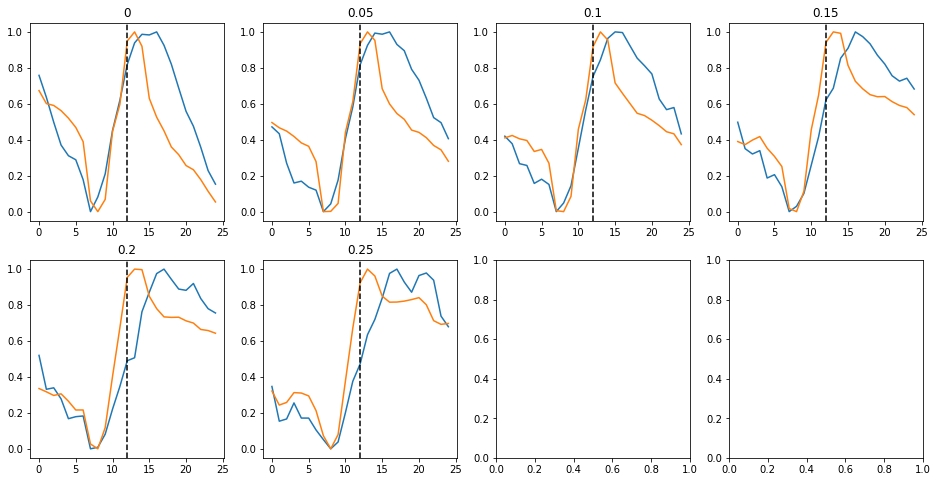

In [892]:
# From protein rises.
def f(x):
    rises_intvol_all = findrises(prot_f,5,3,x,100,norm=True)
    plot_triggered(intvol_f, prot_f, rises_intvol_all, norm=False)
    plt.title(x)
imp.plot_ps(f, [0,0.05,0.1,0.15,0.2,0.25])

2315
Norman!!!!
1340
Norman!!!!
746
Norman!!!!
378
Norman!!!!
190
Norman!!!!
89
Norman!!!!


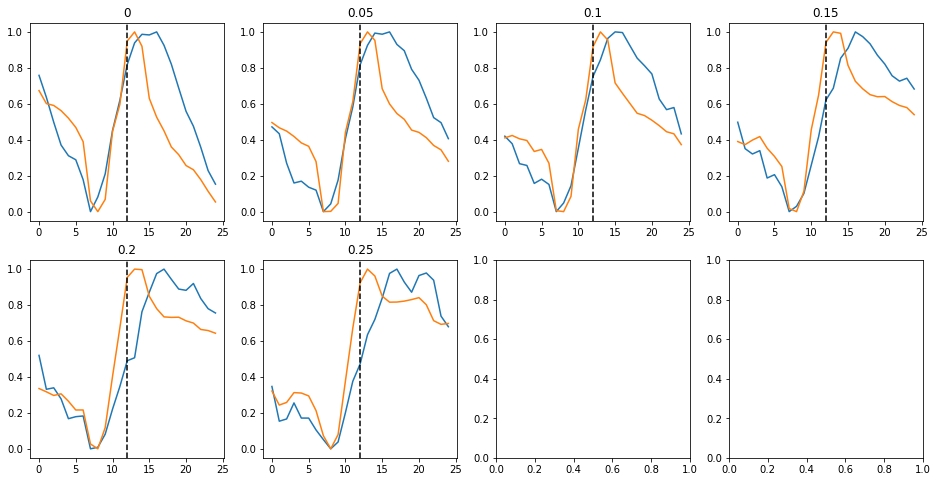

In [893]:
# From protein rises.
def f(x):
    rises_intvol_all = findrises(prot_f,5,3,x,100,norm=True)
    plot_triggered(intvol_f, prot_f, rises_intvol_all, norm=True)
    plt.title(x)
imp.plot_ps(f, [0,0.05,0.1,0.15,0.2,0.25])

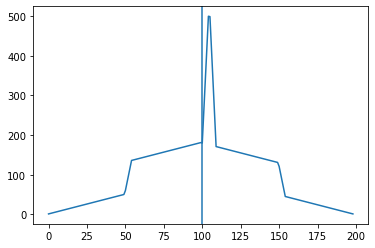

In [886]:
a = np.ones(100)
b = np.ones(100)
a[45:50] = 10 # protein: hump occurs to left
b[51:55] = 10 # MS2: hump occurs to right.
s = signal.correlate(b,a)
r = signal.correlate(np.ones(100), np.ones(100))
#plt.plot(np.divide(s, r))
plt.plot(s)
plt.axvline(x=100)



So when the "hump" in a is to the left of the hump in b, the cross-correlation shifts left. When the hump in b is to the left of the hump in a, the cc shifts right. This is consistent with the protein signal being behind the intvol signal (expected: intvol correlated with protein signal that happened __*before*__)

### Where are we?

It looks pretty compelling that there is an association between Rpb1 signal and MS2 signal. That signal follows the pattern where rises in Rpb1 are associated with subsequent rises in MS2, which is the behavior we would expect given the time to transcribe the stem loops. The lag appears to be around 1 minute, which is approximately in line with expectation. This is of course consistent with the signal coming from elongating pol2.

I think this is really THE question at the moment: are we seeing elongating pol2 or local accumulation beyond that? The transcripts are something like 4 kb long (I think--though I should check on that). Also unclear what the maximum density of pol2 is, but it certainly seems plausible for there to be on the order of 100 molecules (spacing of 40 bp). That is at least plausibly within the range of being visible.

I can see two paths to getting at this question based on what we have in hand:

1. Estimating the absolute number of GFPs at these foci.  
2. Using enrichment at variable-length lacZ loci.  

I can begin working on part 2. What about part 1?

We need some sort of comparison. We've tried those odd standard candles without great success. How about MS2 spots? Looking at GFP enrichment signal at MS2 spots (maybe of variable length?) could perhaps give us at least some bounds on getting this calibration. If we plot the mean strength of the spots (using EGFP and of course attempting to normalize stage and position) as a function of length, that should give us a calibration for fluorescence per molecule, right?

Hell, hell hell. This is too complicated! We already have a fucking system that sends n GFP molecules to the locus!!!!! Jesus H Christ. Just compare the signal of MCP-GFP at the locus (presume 24 MCP-GFPs to 1 elongating Rpb1-GFP) and see what that tells us. For instance, if the signals are comparable, that means there's WAY more pol2 there than could be explained by elongating pol2. Surveying the signal strength of MCP-GFP at a variety of loci (to get a sense of representative genes) should be a good way to at least begin to answer these questions.

It's still not trivial because you have to account for the background pol2. But it's a start.



## Analyzing variable-length lacZ constructs

I collected a bunch of movies with (supposedly) identical eve stripe 2 MS2 reporters with variable length (1.9 kb vs. 3 kb) lacZ transcripts attached. I ran the data through my pipeline but I'm not sure what the smartest way to analyze them is. I guess I'll just dig in and see what they look like.

In [13]:
def radial(data):
    x,y, = imp.mesh_like(data, 2)
    cenx = int(data.shape[0] / 2)
    ceny = int(data.shape[0] / 2)
    dist = np.sqrt(((x - cenx)**2) + ((y - ceny)**2))
    sums = np.zeros(int(dist.max()) + 1)
    counts = np.zeros(int(dist.max()) + 1)
    for i in range(0, data.shape[0]):
        for j in range(0, data.shape[1]):
            dist_bin = int(dist[i,j])
            sums[dist_bin] = sums[dist_bin] + data[i,j]
            counts[dist_bin] = counts[dist_bin] + 1
    return sums / counts

In [5]:
short1 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20200923-rpb1eS2-1p9kb-em1-zsmv-02-06.pkl')

In [29]:
mv = short1
true_ms2 = imp.spot_movies(mv.stack, mv.spot_data, channel=1, fill=0, len_ij=31, view=False)
true_prot = imp.spot_movies(mv.stack, mv.spot_data, channel=0, fill=0, len_ij=31, view=False)

In [30]:
viewer(true_ms2.mean(axis=(0,1,2)),4)

interactive(children=(Dropdown(description='Color', index=5, options=('cividis', 'gray', 'magma', 'inferno', '…

In [31]:
viewer(true_prot.mean(axis=(0,1,2)),4)

interactive(children=(Dropdown(description='Color', index=5, options=('cividis', 'gray', 'magma', 'inferno', '…

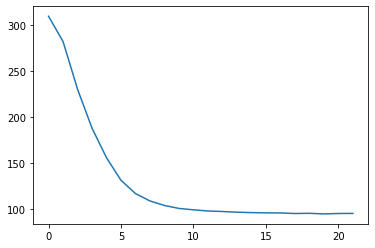

In [32]:
plt.plot(radial(true_ms2.mean(axis=(1,2,0))))

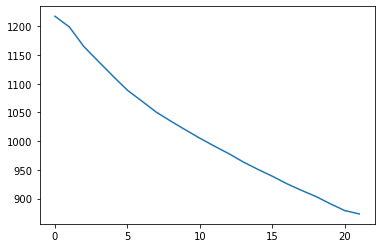

In [33]:
plt.plot(radial(true_prot.mean(axis=(1,2,0))))

In [18]:
long1 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20201005-rpb1eS2-3kb-em2-zsmv-03-04.pkl')

In [34]:
mv = long1
true_ms2 = imp.spot_movies(mv.stack, mv.spot_data, channel=1, fill=0, len_ij=31, view=False)
true_prot = imp.spot_movies(mv.stack, mv.spot_data, channel=0, fill=0, len_ij=31, view=False)
viewer(true_ms2.mean(axis=(0,1,2)),4)

interactive(children=(Dropdown(description='Color', index=5, options=('cividis', 'gray', 'magma', 'inferno', '…

In [35]:
viewer(true_prot.mean(axis=(0,1,2)),4)

interactive(children=(Dropdown(description='Color', index=5, options=('cividis', 'gray', 'magma', 'inferno', '…

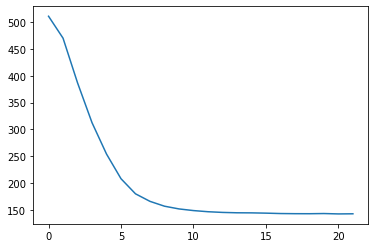

In [26]:
plt.plot(radial(true_ms2.mean(axis=(1,2,0))))

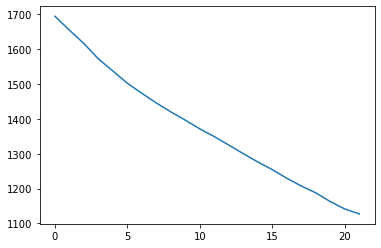

In [36]:
plt.plot(radial(true_prot.mean(axis=(1,2,0))))

In [43]:
def plot4pack(mv):
    true_ms2 = imp.spot_movies(mv.stack, mv.spot_data, channel=1, fill=0, len_ij=31, view=False)
    true_prot = imp.spot_movies(mv.stack, mv.spot_data, channel=0, fill=0, len_ij=31, view=False)
    fig, ax = plt.subplots(2,2)
    ax[0][0].imshow(true_ms2.mean(axis=(0,1,2)))
    ax[0][1].plot(radial(true_ms2.mean(axis=(1,2,0))))
    ax[1][0].imshow(true_prot.mean(axis=(0,1,2)))
    ax[1][1].plot(radial(true_prot.mean(axis=(1,2,0))))

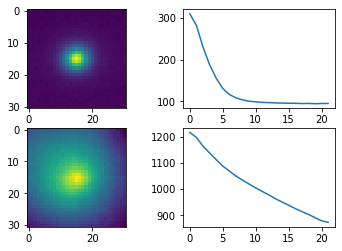

In [44]:
plot4pack(short1)

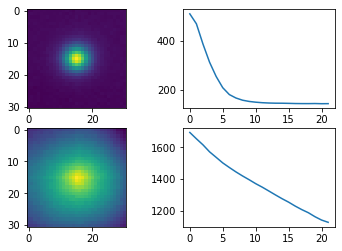

In [45]:
plot4pack(long1)

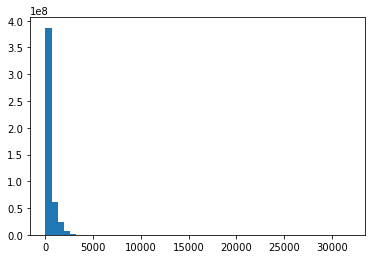

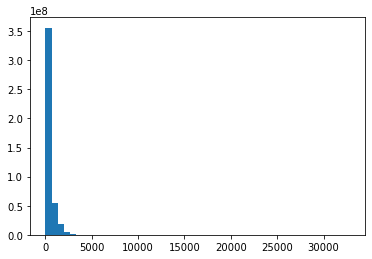

In [51]:
plt.hist(long1.stack[1].flatten(), bins=50);

In [154]:
long1 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20201005-rpb1eS2-3kb-em2-zsmv-03-04.pkl')
long2 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20201005-rpb1eS2-3kb-em4-zsmv-03-04.pkl')
#long3 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20201007-rpb1eS2-3kb-em2-zsmv-01-03.pkl')
#long4 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20201007-rpb1eS2-3kb-em4-zsmv-03.pkl')

In [152]:
short1 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20200923-rpb1eS2-1p9kb-em1-zsmv-02-06.pkl')
short2 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20200923-rpb1eS2-1p9kb-em2-zsmv-01-02.pkl')
short3 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20200923-rpb1eS2-1p9kb-em3-zsmv-03-06.pkl')
short4 = load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/20200923-rpb1eS2-1p9kb-em4-zsmv-04-05.pkl')

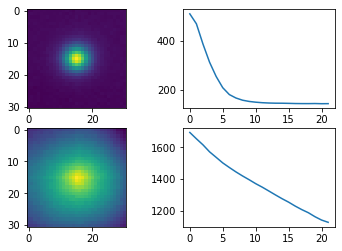

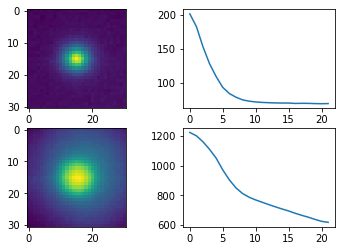

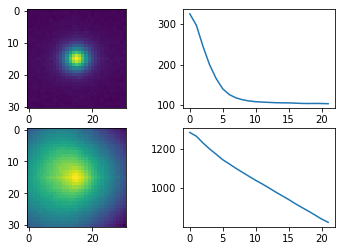

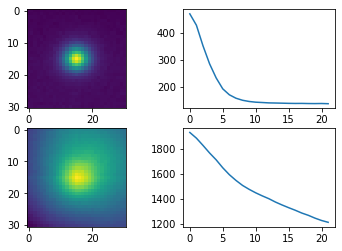

In [54]:
plot4pack(long1)
plot4pack(long2)
plot4pack(long3)
plot4pack(long4)

In [57]:
viewer(true_ms2,4)

interactive(children=(Dropdown(description='Color', index=5, options=('cividis', 'gray', 'magma', 'inferno', '…

In [59]:
true_ms2.max()

23136.0

In [ ]:
# Select non-zero frames? (max > 0)

In [81]:
a=true_ms2[:,:,3:][true_ms2[:,:,3:].max(axis=(3,4)) > 0]

In [150]:
def filter_validframes(sm_in, z, minlen=20):
    sm = sm_in[:,:,z]
    frames = np.ndarray((0,sm.shape[-2], sm.shape[-1]))
    for s in range(0,len(sm)):
        valid = sm[s].max(axis=(1,2)) > 0
        if (np.count_nonzero(valid) >= minlen):
            frames = np.vstack((frames, sm[s,valid]))
    return frames

def plot4pack2(mv, z, minlen):
    true_ms2 = imp.spot_movies(mv.stack, mv.spot_data, channel=1, fill=0, len_ij=31, view=False)
    true_prot = imp.spot_movies(mv.stack, mv.spot_data, channel=0, fill=0, len_ij=31, view=False)
    true_ms2 = filter_validframes(true_ms2, z, minlen)
    true_prot = filter_validframes(true_prot, z, minlen)
    fig, ax = plt.subplots(2,2)
    ax[0][0].imshow(true_ms2.mean(axis=(0)))
    ax[0][1].plot(radial(true_ms2.mean(axis=(0))))
    ax[0][1].set_ylim(0,4000)
    ax[1][0].imshow(true_prot.mean(axis=(0)))
    ax[1][1].plot(radial(true_prot.mean(axis=0)))
    ax[1][1].set_ylim(2000,7500)

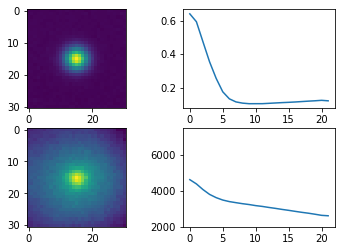

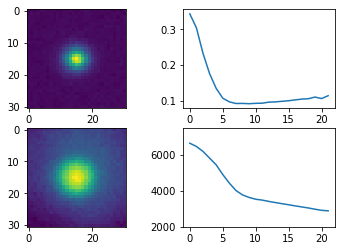

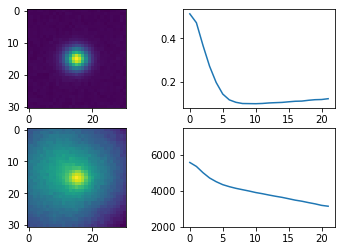

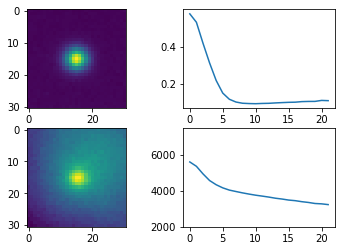

In [139]:
plot4pack2(long1, 3, 20)
plot4pack2(long2, 3, 20)
plot4pack2(long3, 3, 20)
plot4pack2(long4, 3, 20)

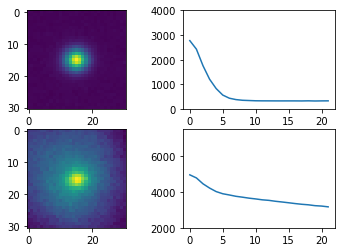

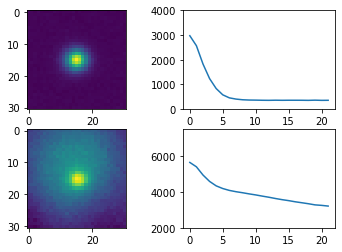

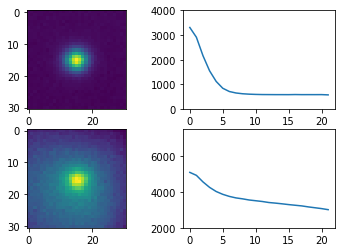

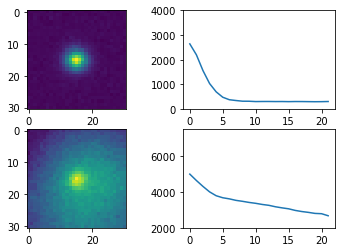

In [153]:
plot4pack2(short1, 3, 20)
plot4pack2(short2, 3, 20)
plot4pack2(short3, 3, 20)
plot4pack2(short4, 3, 20)

This is pretty opaque. It seems like it's going to take some more digging to make sure we can use these absolute intensities. I pulled up the "short" movies in imageJ. Looking at the same slice, it seems like 1 and 2 have similar background intensities, 3 has a higher background and 4 has a lower background. This agrees with the variable peak heights observed above. It seems like some kind of background normalization (as well as potentially a bleaching correction) will be necessary for this analysis.

Also, I wonder about using the integrated intensities...

In [172]:
np.nanmean(short1.intvol.values.flatten())

1071.6195657413919

In [173]:
np.nanmean(short2.intvol.values.flatten())

1101.8444427484765

In [171]:
np.nanmean(short3.intvol.values.flatten())

1370.5927740205825

In [174]:
np.nanmean(short4.intvol.values.flatten())

920.0721504697009

In [175]:
np.nanmean(long1.intvol.values.flatten())

1179.206276638927

In [176]:
np.nanmean(long2.intvol.values.flatten())

899.5209473066316

OK, how about this. 

1) Do a bleaching correction for each frame (based on frame mean to start).  
2) Filter for trajectory length.  
3) Look at the mean (maybe other features) for each spot (and the distribution of spot intensities). 

In [200]:
def bleach_corrs(mv, c):
    """Finds correction factors for each frame to equalize the frame means (for a single channel)"""
    stack = mv.stack.copy()
    corr = []
    c_mean = np.mean(stack[c])
    for f in range(0, stack.shape[1]):
        f_mean = np.mean(stack[c, f])
        corr.append(c_mean/f_mean)
    return corr

def filter_df_minlen(df, minlen):
    """Filter dataframe to retain only columns that contain >= minlen non NaN values"""
    df_f = df.copy()
    def test(x):
        if (np.count_nonzero(~np.isnan(x)) >= minlen):
            return True
        return False
    boolean = df_f.apply(test, axis=0)
    df_f = df_f.iloc[:,np.where(boolean)[0]]
    df_f.columns=np.arange(1, df_f.shape[1]+1)
    return df_f

def f2(mv, p_channel=0, m_channel=1):
    m_corrs = bleach_corrs(mv, m_channel)
    intvol_cor = mv.intvol.multiply(m_corrs, axis="rows")
    

f2(long1)


### New notebook

I've realized in banging on this that the lengths analysis deserves its own notebook (plus this one is getting lengthy). Going to move on to notebook 13.